In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


[Read more polynomial of sklearn](https://www.w3schools.com/python/python_ml_polynomial_regression.asp)

# **Show data**

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Machine Learning/excelData/AnnualPowerLoad.csv")

NameError: ignored

In [ ]:
x = df['Year']
y = df['Beijing city']

plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Power Load (MW)')
plt.show()

NameError: ignored

# **Show simple conception of polynomial degree 2**

In [ ]:
X_np = np.array(x).reshape(x.shape[0], 1)    # convert x from 1-dimension to 2 dimension.
X_np

array([[1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010]])

In [ ]:
deg = 2
poly = PolynomialFeatures(degree=deg)  # calculate polynomial with degree 2.
X = poly.fit_transform(X_np)           # calculated
X

array([[1.000000e+00, 1.978000e+03, 3.912484e+06],
       [1.000000e+00, 1.979000e+03, 3.916441e+06],
       [1.000000e+00, 1.980000e+03, 3.920400e+06],
       [1.000000e+00, 1.981000e+03, 3.924361e+06],
       [1.000000e+00, 1.982000e+03, 3.928324e+06],
       [1.000000e+00, 1.983000e+03, 3.932289e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06],
       [1.000000e+00, 1.985000e+03, 3.940225e+06],
       [1.000000e+00, 1.986000e+03, 3.944196e+06],
       [1.000000e+00, 1.987000e+03, 3.948169e+06],
       [1.000000e+00, 1.988000e+03, 3.952144e+06],
       [1.000000e+00, 1.989000e+03, 3.956121e+06],
       [1.000000e+00, 1.990000e+03, 3.960100e+06],
       [1.000000e+00, 1.991000e+03, 3.964081e+06],
       [1.000000e+00, 1.992000e+03, 3.968064e+06],
       [1.000000e+00, 1.993000e+03, 3.972049e+06],
       [1.000000e+00, 1.994000e+03, 3.976036e+06],
       [1.000000e+00, 1.995000e+03, 3.980025e+06],
       [1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 1.997000e

In [ ]:
X_inv = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)    # find pseudo inverse
X_inv

array([[ 3.04808385e+03,  2.47790670e+03,  1.94447217e+03,
         1.44778027e+03,  9.87830998e+02,  5.64624351e+02,
         1.78160329e+02, -1.71561065e+02, -4.84539834e+02,
        -7.60775976e+02, -1.00026949e+03, -1.20302038e+03,
        -1.36902864e+03, -1.49829428e+03, -1.59081729e+03,
        -1.64659767e+03, -1.66563543e+03, -1.64793056e+03,
        -1.59348306e+03, -1.50229294e+03, -1.37436019e+03,
        -1.20968482e+03, -1.00826681e+03, -7.70106187e+02,
        -4.95202932e+02, -1.83557051e+02,  1.64831457e+02,
         5.49962591e+02,  9.71836351e+02,  1.43045274e+03,
         1.92581175e+03,  2.45791339e+03,  3.02675766e+03],
       [-3.05194711e+00, -2.48037547e+00, -1.94565786e+00,
        -1.44779428e+00, -9.86784730e-01, -5.62629202e-01,
        -1.75327700e-01,  1.75119775e-01,  4.88713223e-01,
         7.65452646e-01,  1.00533804e+00,  1.20836941e+00,
         1.37454675e+00,  1.50387007e+00,  1.59633936e+00,
         1.65195463e+00,  1.67071586e+00,  1.65262307e+

**Find A B C in matrix A**

$y = Ax^{2} + Bx + C$

$A = X^{-1}\cdot Y$

In [ ]:
A = X_inv.dot(y)
A

array([ 3.82481076e+05, -3.85788735e+02,  9.72834635e-02])

**Predict**

In [ ]:
y_predict = X.dot(A)
y_predict

array([10.95354395, 10.11547451,  9.47197199,  9.02303641,  8.76866775,
        8.70886602,  8.84363121,  9.17296333,  9.69686238, 10.41532836,
       11.32836126, 12.43596109, 13.73812785, 15.23486153, 16.92616214,
       18.81202968, 20.89246415, 23.16746554, 25.63703386, 28.30116911,
       31.15987128, 34.21314038, 37.46097641, 40.90337936, 44.54034924,
       48.37188605, 52.39798979, 56.61866045, 61.03389804, 65.64370256,
       70.448074  , 75.44701237, 80.64051767])

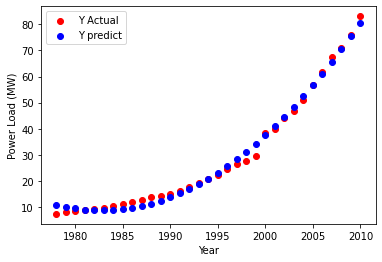

In [ ]:
plt.scatter(x, y, color='r', label='Y Actual')
plt.scatter(x, y_predict, color='b', label='Y predict')
plt.xlabel('Year')
plt.ylabel('Power Load (MW)')
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

# **Simple to implement**

## **Define Function polynomial**

In [ ]:
def polynomialRegression(x, y, deg=2):
  poly = PolynomialFeatures(degree=deg)
  X = poly.fit_transform(x)

  X_inv = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
  A = X_inv.dot(y)

  return X.dot(A), A

In [ ]:
X_np = np.array(x).reshape(x.shape[0], 1)

## **Calculation Polynomial degree 1 - 9**

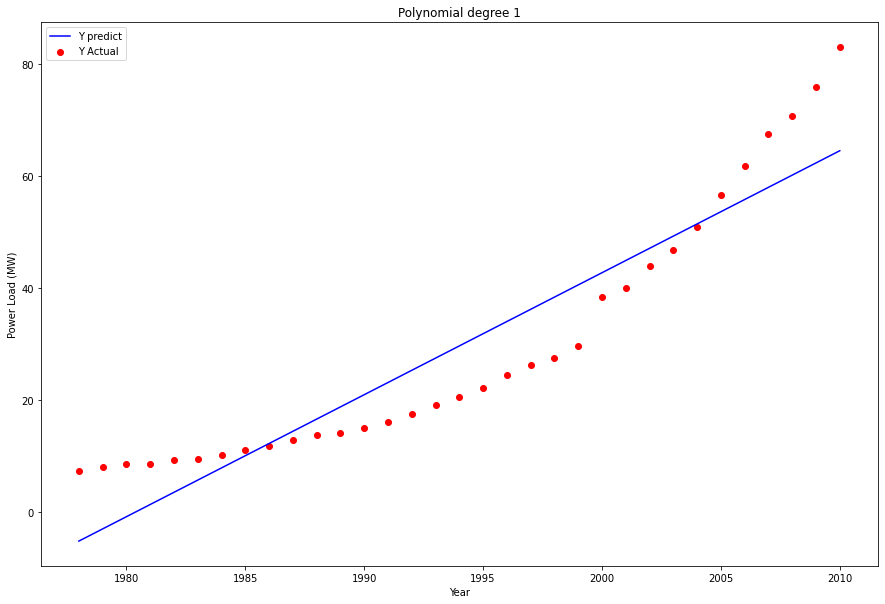

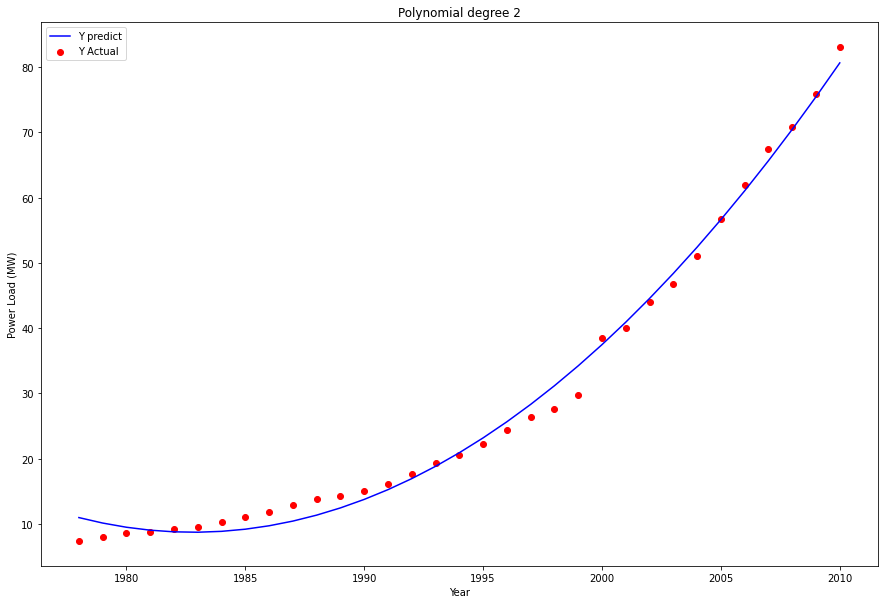

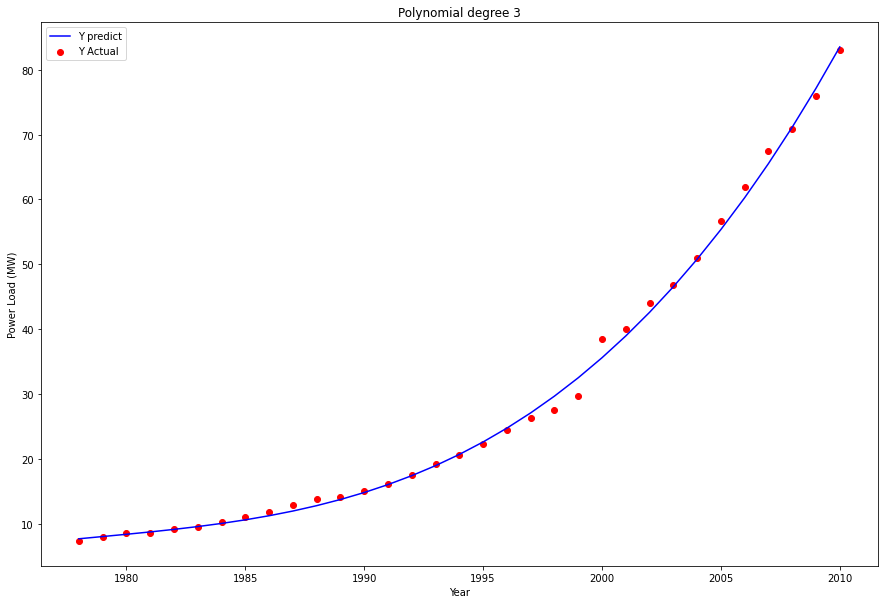

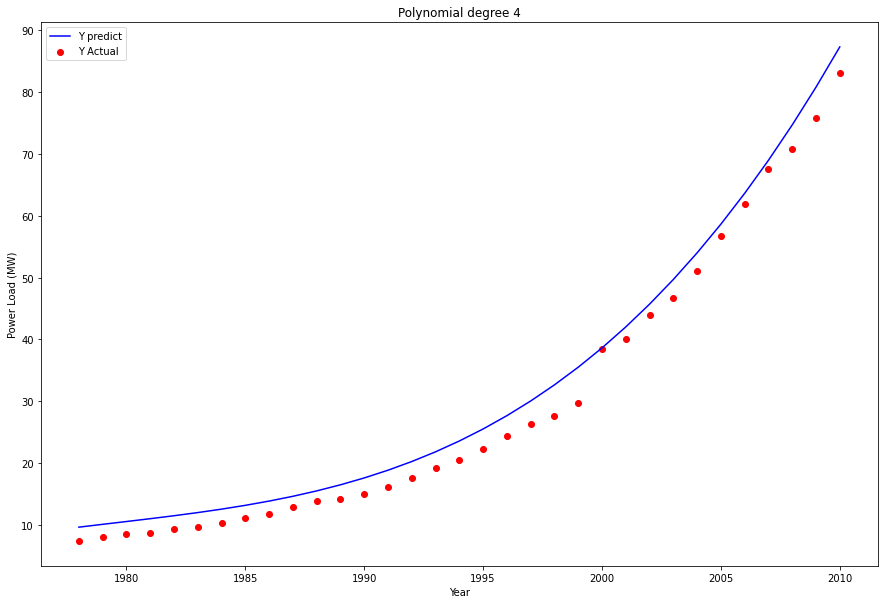

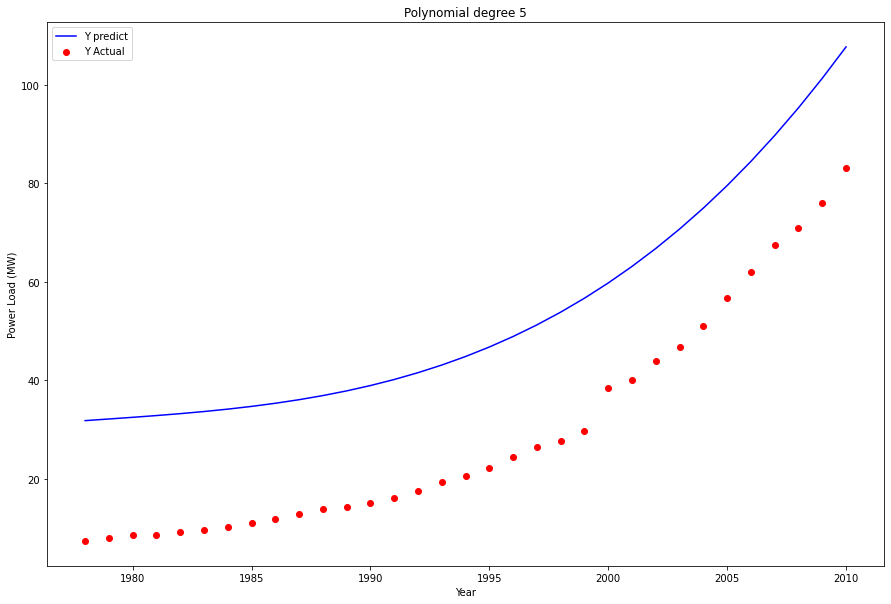

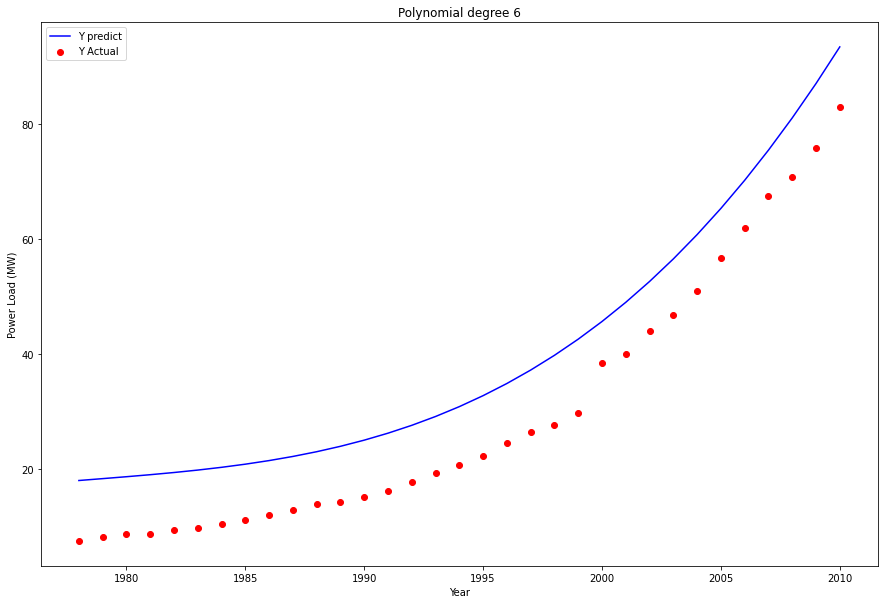

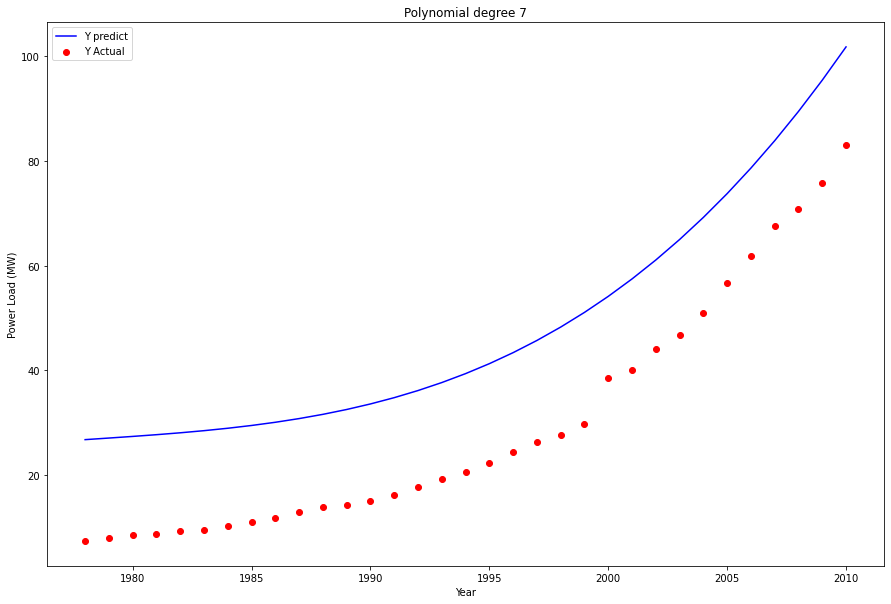

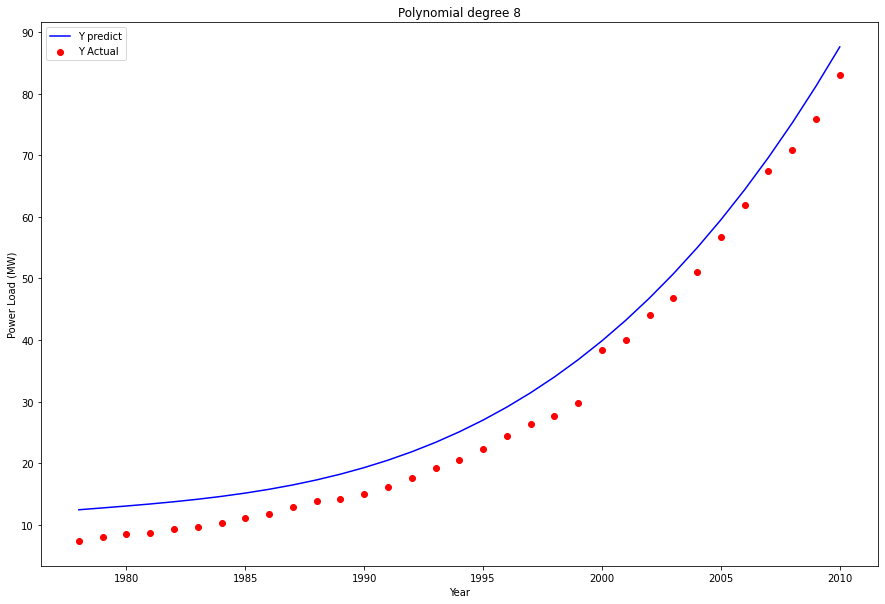

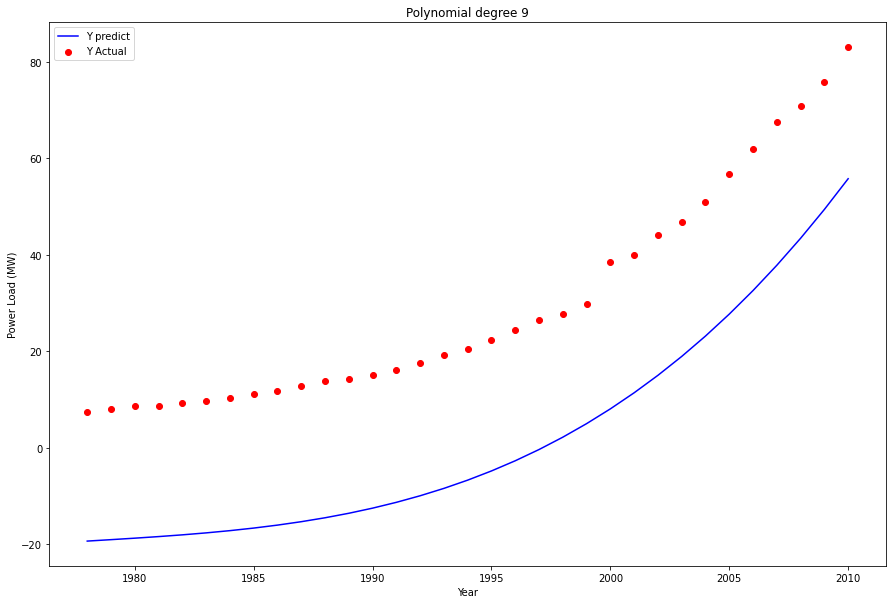

In [ ]:
for i in range(1, 10):
  y_predict, coeff = polynomialRegression(X_np, y, deg=i)
  plt.scatter(x, y, color='r', label='Y Actual')
  plt.plot(x, y_predict, color='b', label='Y predict')
  plt.xlabel('Year')
  plt.ylabel('Power Load (MW)')
  plt.title('Polynomial degree ' + str(i))
  plt.rcParams['figure.figsize'] = [15, 10]
  plt.legend()
  plt.show()

## **Improve Offset**

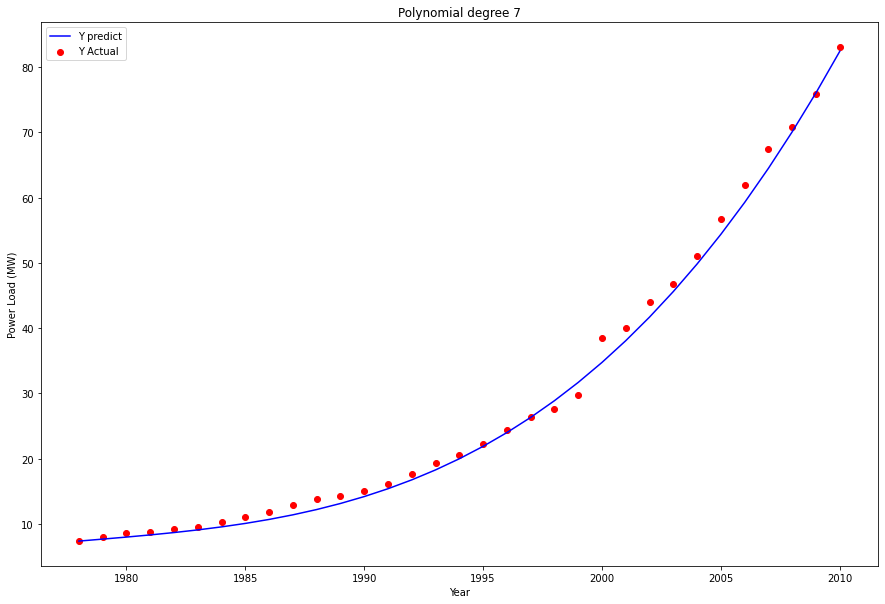

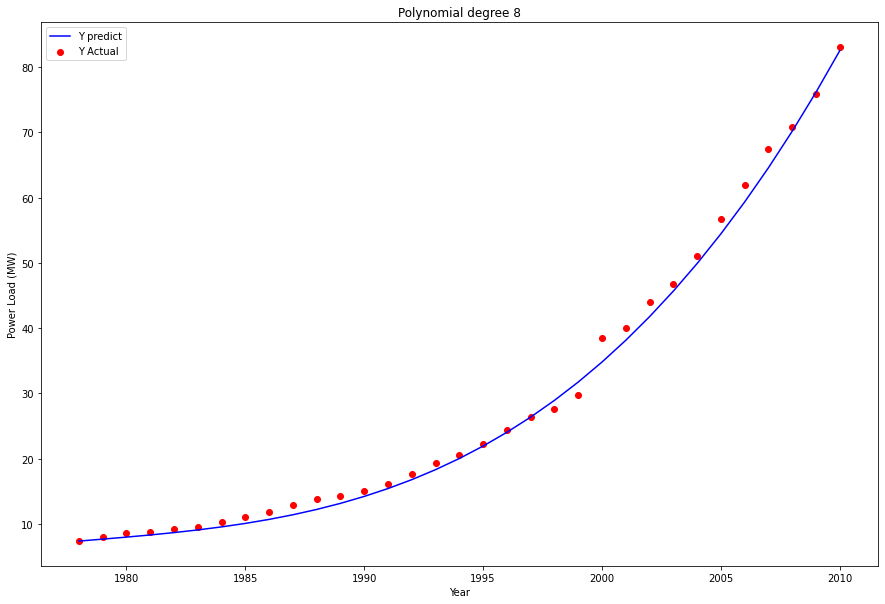

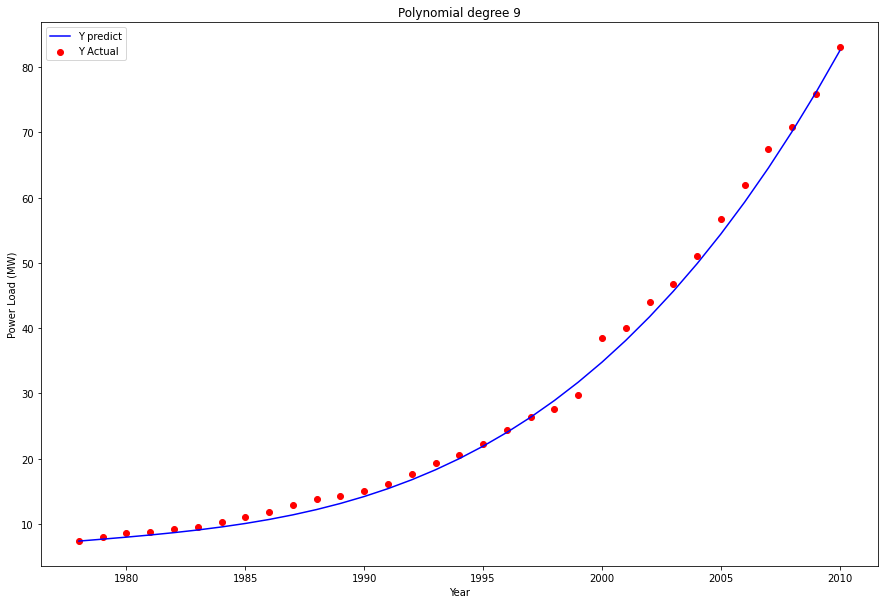

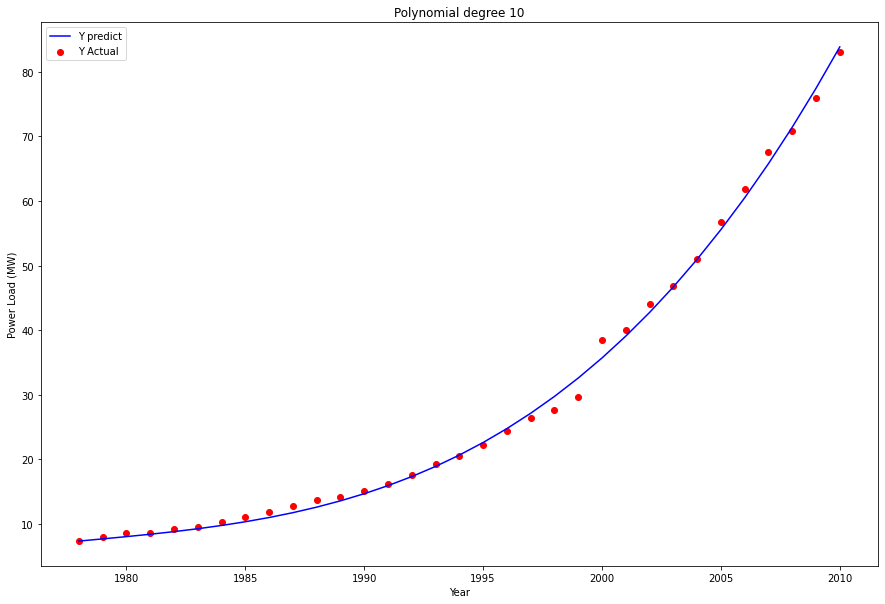

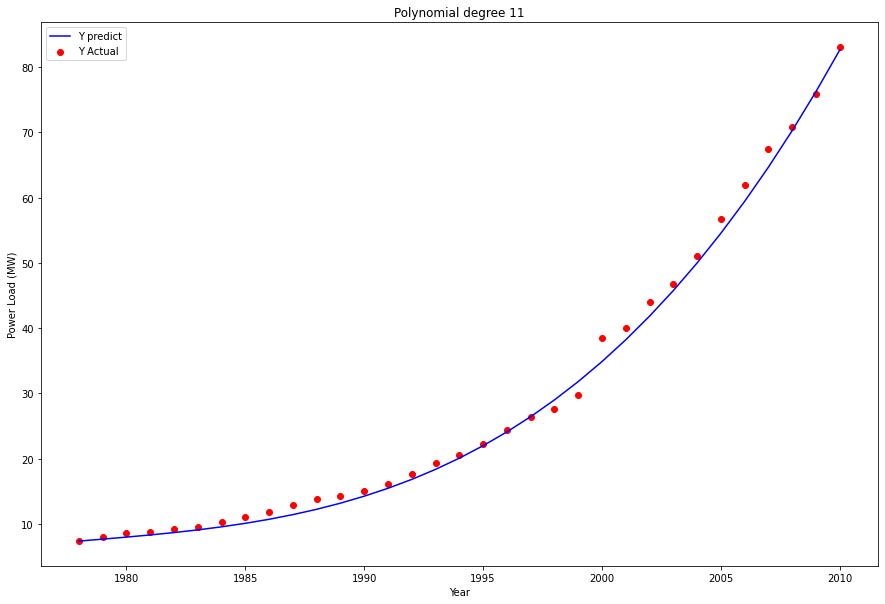

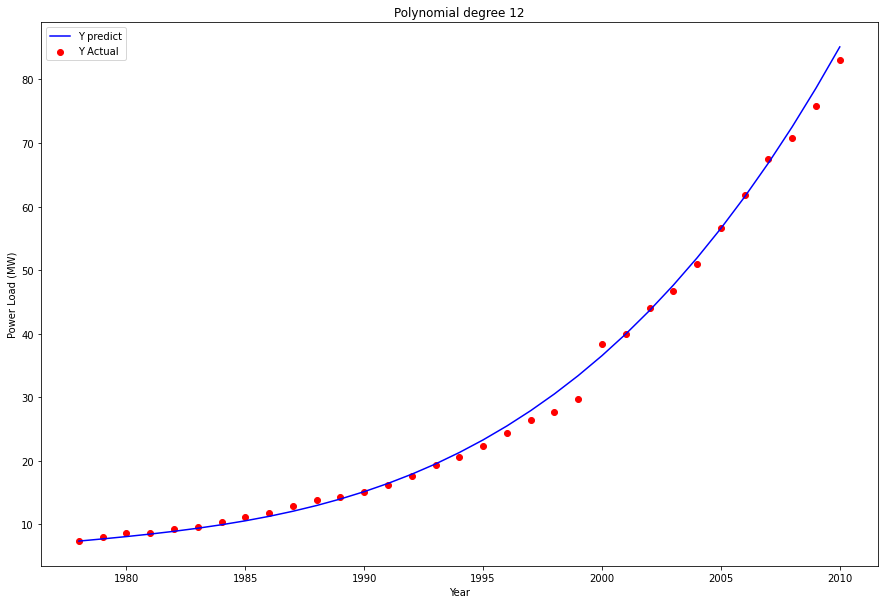

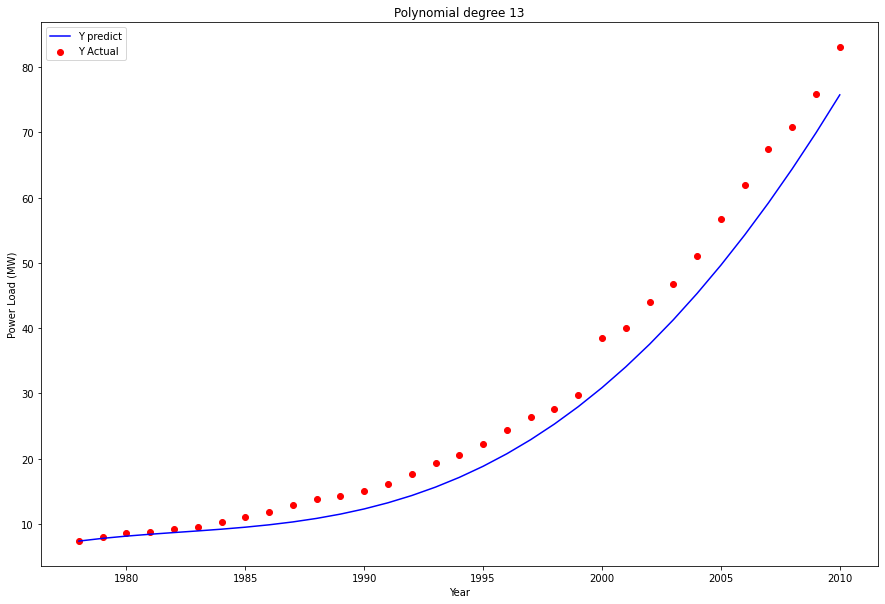

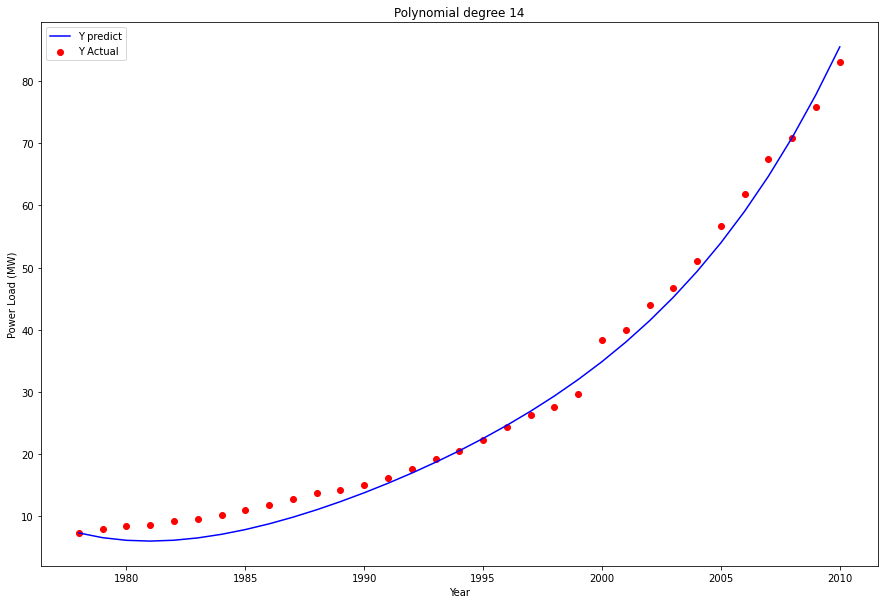

In [ ]:
for i in range(7, 15):
    'call function'
    y_predict, coeff = polynomialRegression(X_np, y, deg=i)
    offset = y[0] - y_predict[0]
    y_predict = y_predict + offset
    'plot graph'
    plt.scatter(x, y, color='r', label='Y Actual')
    plt.plot(x, y_predict, color='b', label='Y predict')
    plt.xlabel('Year')
    plt.ylabel('Power Load (MW)')
    plt.title('Polynomial degree ' + str(i))
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.legend()
    plt.show()

## **Prediction**

In [ ]:
y_predict, coeff = polynomialRegression(X_np, y, deg=4)
poly = PolynomialFeatures(degree=4)
x_input = np.reshape(poly.fit_transform([[2020]]), -1)

In [ ]:
x_input

array([1.00000000e+00, 2.01100000e+03, 4.04412100e+06, 8.13272733e+09,
       1.63549147e+13])

In [ ]:
coeff

array([ 4.65184551e+06, -1.79954426e+04,  2.01487860e+01, -8.97892174e-03,
        1.41095676e-06])

In [ ]:
y_out = np.dot(x_input, coeff).sum()
y_out

177.72756796702743

## **Test with new data**

In [ ]:
data = np.array([[0.0541, 0.0685],
	               [0.1118, 0.1822],
	               [0.1348, 0.3601],
	               [0.2454, 0.4883],
	               [0.3283, 0.4329],
	               [0.4389, 0.6516],
	               [0.6071, 0.7157],
	               [0.6740, 0.4242],
	               [0.7961, 0.6020],
	               [0.9090, 0.4796]])

x = data[:, 0]
y = data[:, 1]

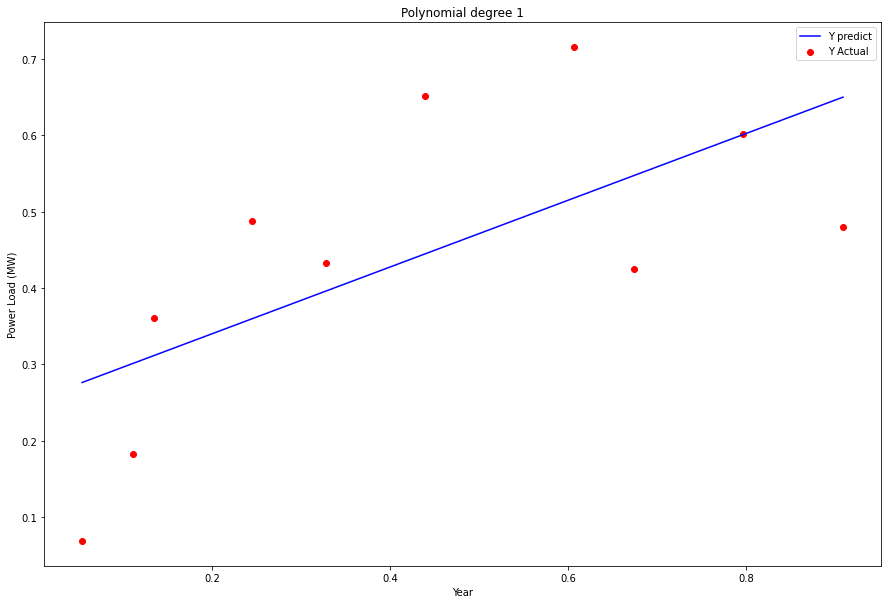

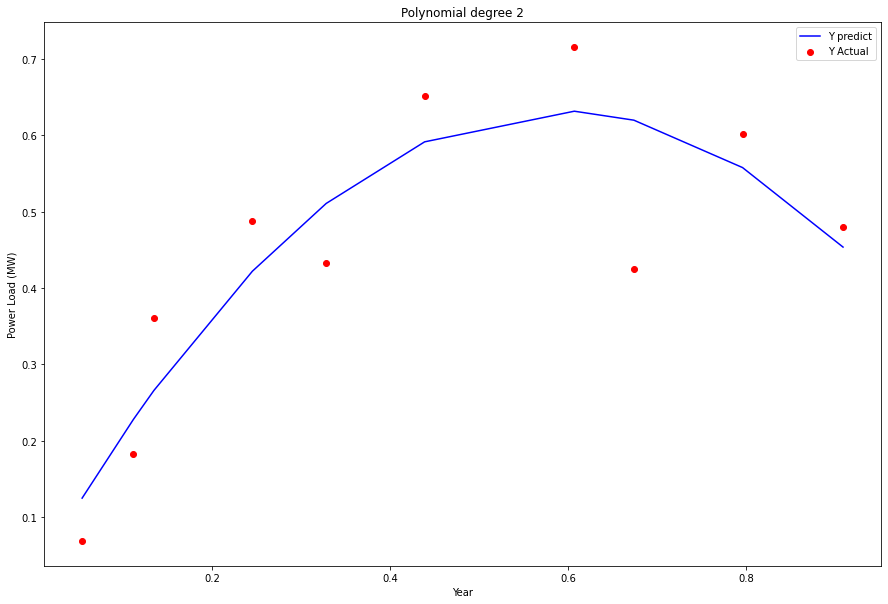

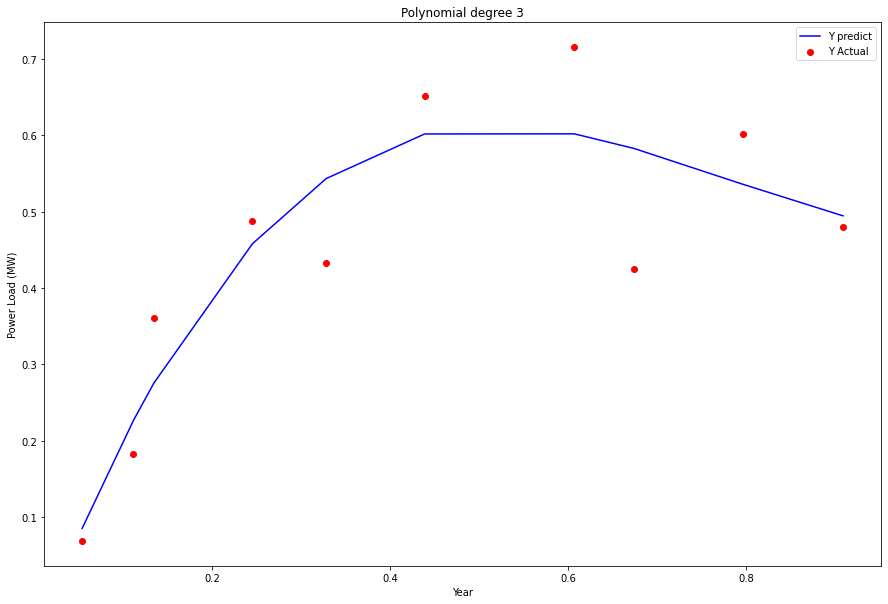

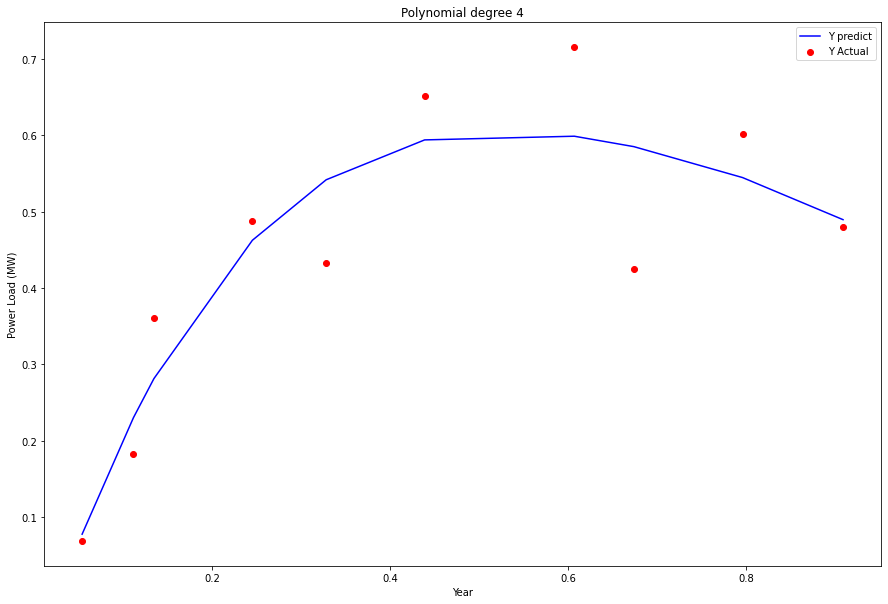

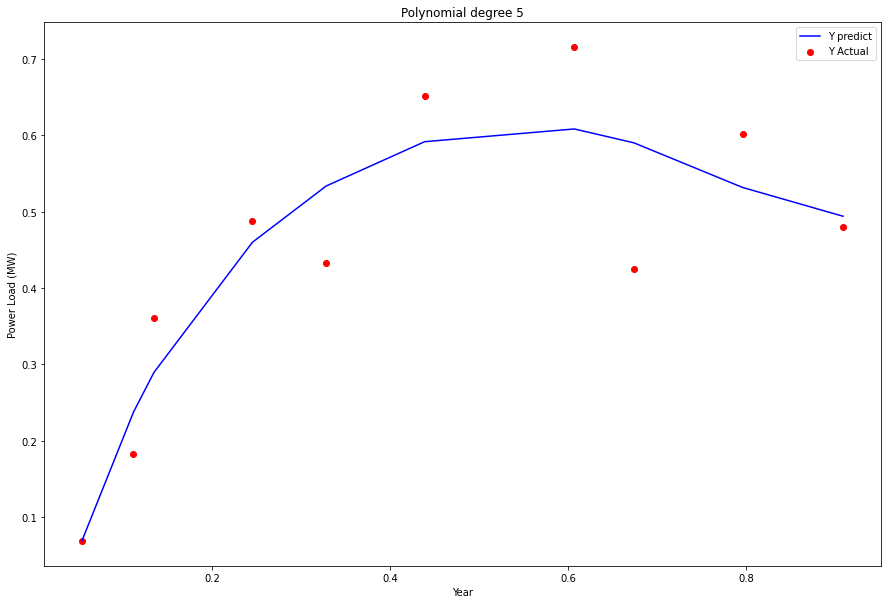

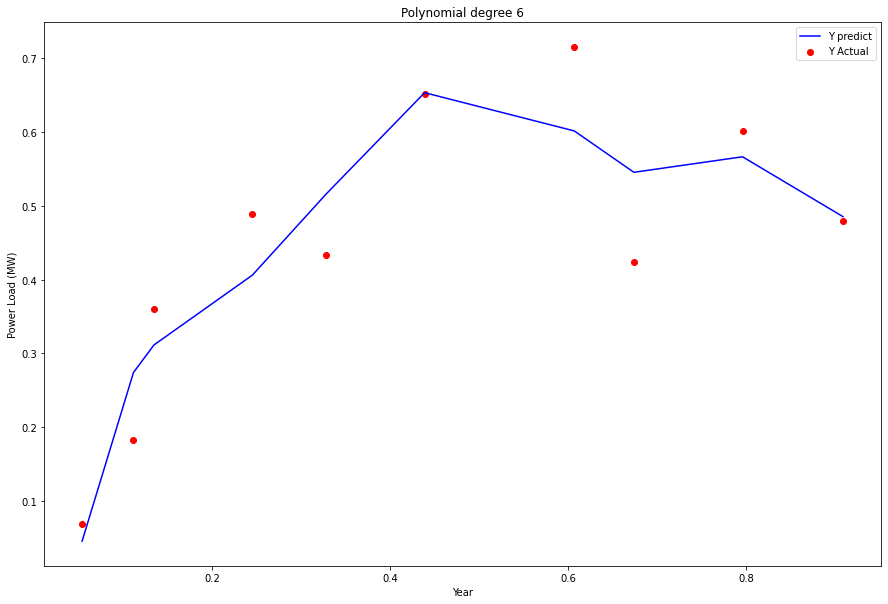

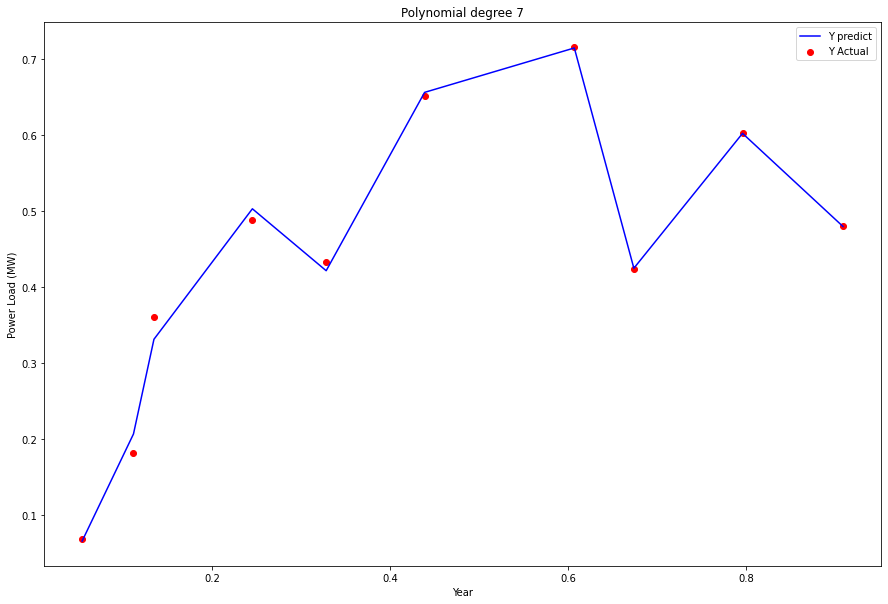

In [ ]:
x_np = np.array([x]).reshape(x.shape[0], 1)

for i in range(1, 8):
    'call function'
    y_predict, coeff = polynomialRegression(x_np, y, deg=i)
    'plot graph'
    plt.scatter(x, y, color='r', label='Y Actual')
    plt.plot(x, y_predict, color='b', label='Y predict')
    plt.xlabel('Year')
    plt.ylabel('Power Load (MW)')
    plt.title('Polynomial degree ' + str(i))
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.legend()
    plt.show()